While green and red can be easily differentiated, red and yellow are difficult because the masking is difficult. 

Masking is difficult because the colors overlap each other on the looks. Check out below image to see how close yellow and red are.

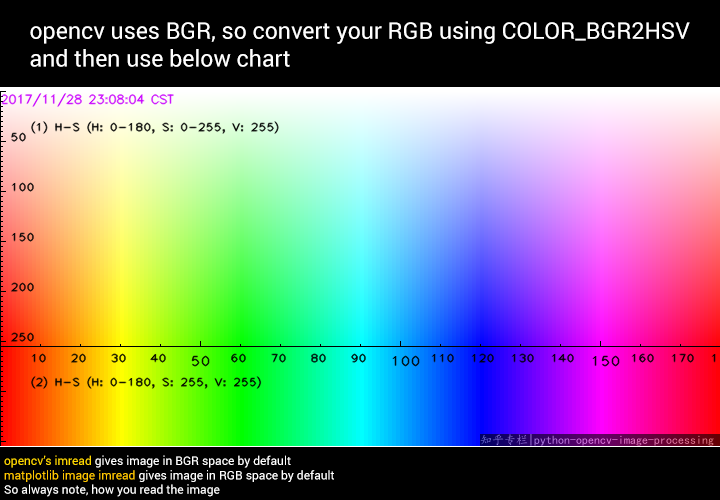

So let us try once again, better masking looping only between red and yellow (and tweaking yellow only) this time.. 

## Step 1: Snippet to check once a particular image

Goal is to have more detection on yellow mask, and less or if possible, none on red mask

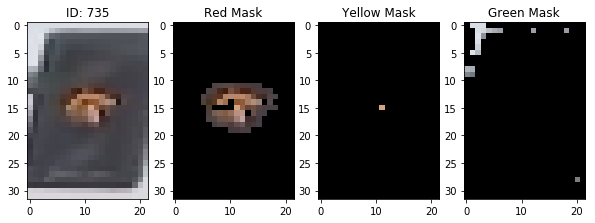

In [14]:
%matplotlib inline 
from IPython.display import Image, display, HTML
import matplotlib.pyplot as plt
from matplotlib import animation
import cv2
import numpy as np
from random import randint

#we get STANDARDIZED_LIST FROM A HELPER FILE
from loaders import STANDARDIZED_LIST

f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(10,5))

# 723 to 757 is yellow 

ax1.clear()
ax2.clear()
ax3.clear()
ax4.clear()

num = 735
image = STANDARDIZED_LIST[num][0]
label = STANDARDIZED_LIST[num][1]

image = image[:, 5:-5, :]
image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# red
ax2.set_title('Red Mask')
red_mask_hsv1 = cv2.inRange(image_hsv, (0,25,50), (12,255,255))
red_mask_hsv2 = cv2.inRange(image_hsv, (150,25,50), (180,255,255))
mask_hsv = cv2.bitwise_or(red_mask_hsv1,red_mask_hsv2)

mask_hsv = cv2.bitwise_not(mask_hsv)  # invert the mask
masked_image = np.copy(image)
masked_image[mask_hsv != 0] = [0, 0, 0]     
ax2.imshow(masked_image, cmap='gray')

# yellow
ax3.set_title('Yellow Mask')
mask_hsv = cv2.inRange(image_hsv, (10,10,210),(31,255,255))   

mask_hsv = cv2.bitwise_not(mask_hsv)  # invert the mask
masked_image = np.copy(image)
masked_image[mask_hsv != 0] = [0, 0, 0]     
ax3.imshow(masked_image, cmap='gray')

# green
ax4.set_title('Green Mask')
mask_hsv = cv2.inRange(image_hsv,(33,12,120),(110,255,255)) 

mask_hsv = cv2.bitwise_not(mask_hsv)  # invert the mask
masked_image = np.copy(image)
masked_image[mask_hsv != 0] = [0, 0, 0]     
ax4.imshow(masked_image, cmap='gray')

ax1.set_title('ID: {}'.format(num))
ax1.imshow(image)

In [13]:
%matplotlib inline 
from IPython.display import Image, display, HTML
import matplotlib.pyplot as plt
from matplotlib import animation
import cv2
import numpy as np
from random import randint

#we get STANDARDIZED_LIST FROM A HELPER FILE
from loaders import STANDARDIZED_LIST

f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(10,5))

# 723 to 757 is yellow 
def animate(i):
    ax1.clear()
    ax2.clear()
    ax3.clear()
    ax4.clear()
    
    num = randint(723, 757)
    image = STANDARDIZED_LIST[num][0]
    label = STANDARDIZED_LIST[num][1]
    
    image = image[:, 5:-5, :]
    image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # red
    ax2.set_title('Red Mask')
    red_mask_hsv1 = cv2.inRange(image_hsv, (0,25,50), (12,255,255))
    red_mask_hsv2 = cv2.inRange(image_hsv, (150,25,50), (180,255,255))
    mask_hsv = cv2.bitwise_or(red_mask_hsv1,red_mask_hsv2)
    
    mask_hsv = cv2.bitwise_not(mask_hsv)  # invert the mask
    masked_image = np.copy(image)
    masked_image[mask_hsv != 0] = [0, 0, 0]     
    ax2.imshow(masked_image, cmap='gray')

    # yellow
    ax3.set_title('Yellow Mask')
    mask_hsv = cv2.inRange(image_hsv, (10,10,210),(31,255,255))   

    mask_hsv = cv2.bitwise_not(mask_hsv)  # invert the mask
    masked_image = np.copy(image)
    masked_image[mask_hsv != 0] = [0, 0, 0]     
    ax3.imshow(masked_image, cmap='gray')
    
    # green
    ax4.set_title('Green Mask')
    mask_hsv = cv2.inRange(image_hsv,(33,12,120),(110,255,255)) 
        
    mask_hsv = cv2.bitwise_not(mask_hsv)  # invert the mask
    masked_image = np.copy(image)
    masked_image[mask_hsv != 0] = [0, 0, 0]     
    ax4.imshow(masked_image, cmap='gray')
    
    ax1.set_title('ID: {}'.format(num))
    ax1.imshow(image)

anim = animation.FuncAnimation(f, animate, frames=10, interval=1000)

plt.close()
HTML(anim.to_html5_video())